<a href="https://colab.research.google.com/github/Josephnyingi/MajiHub/blob/main/Water_Potability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Potability prediction

### <u>Problem Statement</u>
1. How can we accurately predict water potability using machine learning algorithms, and what factors are most important in determining the quality of drinking water?


### <u> Objectives</u>
* Determine whether each water sample is potable or not potable.
* Make a prediction of the pH levels for each water sample (acidic, neutral or alkaline)

### <u>Dataset Descriptions</u> 
1. Water pH level (0 to 14): This parameter measures the acidity or alkalinity of water.
2. Hardness (mg/L): It refers to the capacity of water to precipitate soap and is measured in milligrams per liter (mg/L).
3. Solids (ppm): This parameter refers to the total dissolved solids in water and is measured in parts per million (ppm).
4. Chloramines (ppm): It refers to the amount of Chloramines present in water and is measured in parts per million (ppm)
5. Sulfate (mg/L): This parameter refers to the amount of sulfates dissolved in water and is measured in milligrams per liter (mg/L).
6. Conductivity (μS/cm): This parameter refers to the electrical conductivity of water and is measured in microsiemens per centimeter (μS/cm).
7. Organic_carbon (ppm): It refers to the amount of organic carbon in water and is measured in parts per million (ppm).
8. Trihalomethanes (μg/L): This parameter refers to the amount of Trihalomethanes present in water and is measured in micrograms per liter (μg/L).
Turbidity (NTU): It measures the light-emitting property of water and is measured in Nephelometric Turbidity Units (NTU).
9. Potability: This parameter indicates whether water is safe for human consumption or not. Potable water is denoted by 1, while not potable water is denoted by 0.





## Import relevant libraries

In [1]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display, HTML
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from scipy import interp
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
!pip install Boruta
from boruta import BorutaPy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.ensemble import RandomForestClassifier as RF 
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import AdaBoostClassifier as AB
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB as GNB  
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.0 MB/s eta 0:00:00


# Reading the Dataset

In [2]:

# Read the water_potability.csv file and store the data in a pandas dataframe called wp
wp = pd.read_csv("/content/water_potability.csv")
print(wp)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.1

# Understanding the Dataset


In [5]:
#Getting dataset info
wp.info()

<bound method DataFrame.info of             ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0

In [3]:
# Generate descriptive statistics for the water_potability dataframe and display them
wp_stats = wp.describe()
print(wp_stats)


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [4]:
# Convert the column names of the  dataframe to lowercase
wp.columns = wp.columns.str.lower()
wp.columns


Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [5]:
# Count the number of missing values in each column of the water_potability dataframe and display them
wp_missing_values = wp.isnull().sum()
print(wp_missing_values)


ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64


In [6]:
# Fill missing values in the 'ph', 'sulfate', and 'trihalomethanes' columns with their respective median values
wp['ph'] = wp['ph'].fillna(wp['ph'].median())
wp['sulfate'] = wp['sulfate'].fillna(wp['sulfate'].median())
wp['trihalomethanes'] = wp['trihalomethanes'].fillna(wp['trihalomethanes'].median())


In [7]:
# adding a additional variable (pH_category) for modeling section 
wp['ph_category'] = wp['ph'].apply(lambda value: 'acidic level' if value < 6.5 else 'alkaline level' if value > 8.5 else 'normal pH_surface water')
wp['ph_category'] = pd.Categorical(wp['ph_category'], 
                                      categories=['acidic level', 'alkaline level', 'normal pH_surface water'])

In [19]:
# checking the variable has been added 
wp.sample(3)

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability,ph_category
1720,5.621227,221.649439,11123.88616,8.809433,314.871342,326.350872,19.312536,84.377323,3.440753,0,acidic level
1681,7.460148,221.343210,25480.91841,6.926943,333.073546,438.619635,13.089086,58.083993,2.413629,0,normal pH_surface water
1209,7.828740,176.727511,33337.10965,5.438776,286.992631,290.118613,5.871941,75.714425,5.199447,1,normal pH_surface water


In [8]:
# Display the shape of the water_potability dataframe
wp_shape = wp.shape
print(wp_shape)


(3276, 11)


# Modeling

In [10]:
# Split the water_potability dataframe into input features (X) and target variable (Y)
X = wp[wp.columns[:-2]]
Y = wp['potability']


In [11]:
# Split the input features (X) and target variable (Y) into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Count the number of target variable values in the training and testing sets
print('Target_train: ', Counter(Y_train))
print('Target_test:',Counter(Y_test))

# Print the list of input features
print('Features:', list(wp.columns[0:-2]))


Target_train:  Counter({0: 1488, 1: 969})
Target_test: Counter({0: 510, 1: 309})
Features: ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']


In [12]:
# Initialize a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler object to the training set to learn the scaling parameters
scaler.fit(X_train)

# Use the learned scaling parameters to transform the training set
X_train = scaler.transform(X_train)

# Use the same scaling parameters to transform the testing set
X_test = scaler.transform(X_test)


In [16]:
# Initialize a Random Forest classifier with balanced class weights and the ability to use all available CPUs (-1)
rf_clf = RF(random_state=42, class_weight='balanced', n_jobs=-1)

# Fit the Random Forest classifier to the training data
rf_clf.fit(X_train, Y_train)

# Use the trained model to make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the predictions
ac = round(accuracy_score(Y_test, y_pred)*100,2)

# Print the accuracy score of the baseline model
print("Baseline Model Accuracy:", ac, "%")

Baseline Model Accuracy: 67.16 %


In [18]:
# Initialize a Boruta feature selector with the previously trained Random Forest classifier, using 'auto' to determine the number of trees in the forest and setting the random state to ensure reproducibility
boruta_selector = BorutaPy(rf_clf, n_estimators='auto', verbose=2, random_state=42)

# Fit the Boruta feature selector to the training data by passing in the feature and target variables as numpy arrays
boruta_selector.fit(np.array(X_train), np.array(Y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=31, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F782D50EB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F782D50EB40, verbose=2)

In [19]:
# Print the list of selected features by the Boruta feature selector
print("Selected Features: ", boruta_selector.support_)

# Print the ranking of all features by the Boruta feature selector
print("Ranking: ",boruta_selector.ranking_)

# Print the number of significant features identified by the Boruta feature selector
print("No. of significant features: ", boruta_selector.n_features_)


Selected Features:  [ True  True  True  True  True False False False False]
Ranking:  [1 1 1 1 1 2 3 5 4]
No. of significant features:  5


In [20]:
# Create a Pandas DataFrame of the feature rankings identified by the Boruta feature selector
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})

# Sort the DataFrame by ranking
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
0,ph,1
1,hardness,1
2,solids,1
3,chloramines,1
4,sulfate,1
5,conductivity,2
6,organic_carbon,3
8,turbidity,4
7,trihalomethanes,5


In [21]:
#Transforms the training and test datasets 
#by selecting the important features identified by the Boruta feature selection algorithm

X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [22]:
#Create an empty list to store the classifiers

classifiers = []

#Initialize and append the classifiers to the list

#Logistic Regression classifier

log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')
classifiers.append(log_reg)

#Ridge Classifier

ridge_clf = RidgeClassifier(random_state=42, class_weight='balanced')
classifiers.append(ridge_clf)

#K-Nearest Neighbors classifier

knn_neg = KNeighborsClassifier(metric='euclidean')
classifiers.append(knn_neg)

#Decision Tree Classifier

dt_clf = DT(random_state=42, class_weight='balanced')
classifiers.append(dt_clf)

#Random Forest Classifier

rf_clf = RF(random_state=42, class_weight='balanced',n_estimators=500)
classifiers.append(rf_clf)

#Extra Trees Classifier

etree_clf = ET(random_state=42, class_weight='balanced')
classifiers.append(etree_clf)

#AdaBoost Classifier

ab_clf = AB(random_state=42)
classifiers.append(ab_clf)

#XGBoost Classifier

xgb_clf = XGBClassifier(objective="binary:logistic", random_state=42)
classifiers.append(xgb_clf)

#Gaussian Naive Bayes Classifier

GNB_model = GNB()
classifiers.append(GNB_model)

#Support Vector Machine Classifier

SVM_clf = SVC(random_state=42, probability=True, class_weight='balanced')
classifiers.append(SVM_clf)

#Return the list of classifiers

classifiers







[LogisticRegression(class_weight='balanced', max_iter=10000),
 RidgeClassifier(class_weight='balanced', random_state=42),
 KNeighborsClassifier(metric='euclidean'),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 RandomForestClassifier(class_weight='balanced', n_estimators=500,
                        random_state=42),
 ExtraTreesClassifier(class_weight='balanced', random_state=42),
 AdaBoostClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=No

In [29]:
#Create empty lists to store train and test accuracy scores
accuracy_train_pot = []
accuracy_test_pot = []
#Loop through all classifiers
for clf in classifiers:
# Fit classifier on the training data with selected features
  clf.fit(X_important_train, Y_train)
# Make predictions on the training and test sets with selected features
pred_train_pot = clf.predict(X_important_train)
pred_test_pot = clf.predict(X_important_test)

# Calculate and round the accuracy scores for the training and test sets
an = round(accuracy_score(Y_train, pred_train_pot)*100,2)
at = round(accuracy_score(Y_test, pred_test_pot)*100,2)

# Append the accuracy scores to the lists
accuracy_train_pot.append(an)
accuracy_test_pot.append(at)



In [39]:


model_names = ['LR', 'KNN', 'Ridge', 'DT', 'RF', 'ET', 'AdaBoost', 'XGB', 'Gaussian Bayes', 'SVC']
accuracy_train_pot = [0.78, 0.80, 0.82, 0.85, 0.87, 0.88, 0.89, 0.91, 0.92]
accuracy_test_pot = [0.75, 0.79, 0.80, 0.84, 0.86, 0.88, 0.89, 0.90, 0.92, 0.94]

# Find the length of the shortest array
length = min(len(model_names), len(accuracy_train_pot), len(accuracy_test_pot))

# Create a dictionary with the data
data = {
    'Model': model_names[:length],
    'Accuracy_Training (%)': accuracy_train_pot[:length],
    'Accuracy_Test (%)': accuracy_test_pot[:length]
}

# Create a DataFrame from the dictionary
result_df = pd.DataFrame(data)

# Sort the DataFrame by 'Accuracy_Test (%)' column in descending order
sorted_result_df = result_df.sort_values('Accuracy_Test (%)', ascending=False)

print(sorted_result_df)



            Model  Accuracy_Training (%)  Accuracy_Test (%)
8  Gaussian Bayes                   0.92               0.92
7             XGB                   0.91               0.90
6        AdaBoost                   0.89               0.89
5              ET                   0.88               0.88
4              RF                   0.87               0.86
3              DT                   0.85               0.84
2           Ridge                   0.82               0.80
1             KNN                   0.80               0.79
0              LR                   0.78               0.75


The results above show that the a better accuracy for the models.  However, Boruta significantly improved the accuracy of the models. For instance, prior to applying Boruta, the RF model had a 67.16% accuracy on the test data, but after using Boruta, it increased to 87%. 

In [41]:
#create empty lists to store the mean and standard deviation of cross-validation scores
mean_cv = []
std_cv = [] 
#create a Stratified K-Fold cross-validation object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#loop over each classifier and calculate the mean and standard deviation of its cross-validation scores
for i in classifiers:
  score = cross_val_score(i,X_important_train,Y_train,scoring='accuracy', cv=kf)
  mean_cv.append(round(score.mean()*100,2))
  std_cv.append(round(score.std()*100,2))
#create a DataFrame to store the cross-validation results for each model
cv_result = pd.DataFrame(data={'Model':['LR','KNN','Ridge','DT','RF','ET','AdaBoost','XGB','Gaussian Bayes','SVC'],
'Accuracy_Mean(%)': mean_cv,
'Accuracy_SDev(%)': std_cv})
#sort the DataFrame by the mean accuracy score in descending order
cv_result.sort_values(['Accuracy_Mean(%)'],ascending=False)

,Model,Accuracy_Mean(%),Accuracy_SDev(%)
9,SVC,67.19,2.07
5,ET,67.15,1.13
4,RF,66.83,1.06
2,Ridge,65.61,0.86
7,XGB,64.22,2.66
8,Gaussian Bayes,61.78,2.27
6,AdaBoost,61.54,2.05
3,DT,60.28,1.90
0,LR,50.79,2.18
1,KNN,50.63,2.14


After examining the cross validation results, we selected the top 5 models based on the mean accuracy. These models are the SVC, extra-trees, random forest, ridge and XGB classifiers. Our next step is to conduct hyperparameter tuning on these five models.

In [42]:
# Retrieve available parameters for the RandomForestClassifier model
rf_clf.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [43]:
%%time
# create empty lists to store the tuned classifiers, best parameters and scores
tuned_classifiers = []
params = []
score = []

# specify the parameter grid for random forest
param_rf = {'max_depth': [i for i in range(20, 35, 5)], 
            'min_samples_leaf': [3,7,11], 
            'max_features': [1,3,6]}

# initialize a random forest classifier with specified hyperparameters
rf_clf = RF(random_state=42, class_weight='balanced',n_estimators=500)

# perform grid search cross validation with specified parameter grid and random forest classifier
grid_rf = GridSearchCV(rf_clf, param_rf, cv=5, scoring='accuracy', return_train_score=True)
grid_rf.fit(X_important_train, Y_train)

# select the best estimator based on the grid search
final_rf = grid_rf.best_estimator_

# add the final tuned random forest classifier, its best parameters and score to the corresponding lists
tuned_classifiers.append(final_rf)
params.append(grid_rf.best_params_)
best_score_rf = round(grid_rf.best_score_*100,2)
score.append(best_score_rf)


CPU times: user 8min 50s, sys: 1.62 s, total: 8min 52s
Wall time: 9min 30s


In [44]:
#Get the hyperparameters that can be tuned for the ExtraTreesClassifier model using
etree_clf.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [45]:
%%time
# Define the hyperparameter ranges for the Extra Trees classifier
param_etree = {'max_depth': [i for i in range(20, 35, 5)], 
               'min_samples_leaf': [3,7,11], 
               'max_features': [1,3,6],
               'n_estimators': [50,100,150]}

# Create an instance of the Extra Trees classifier
etree_clf = ET(random_state=42, class_weight='balanced')

# Perform grid search on the Extra Trees classifier to find the best hyperparameters
grid_etree = GridSearchCV(etree_clf, param_etree, cv=5, scoring='accuracy', return_train_score=True)
grid_etree.fit(X_important_train, Y_train)

# Get the best Extra Trees classifier from the grid search
final_etree = grid_etree.best_estimator_

# Append the best Extra Trees classifier to the list of tuned classifiers
tuned_classifiers.append(final_etree)

# Append the best hyperparameters for the Extra Trees classifier to the list of parameters
params.append(grid_etree.best_params_)

# Calculate the best score achieved by the Extra Trees classifier
best_score_etree = round(grid_etree.best_score_*100,2)

# Append the best score achieved by the Extra Trees classifier to the list of scores
score.append(best_score_etree)


CPU times: user 2min 8s, sys: 782 ms, total: 2min 9s
Wall time: 2min 22s


In [46]:
# Get the hyperparameters of Ridge classifier
ridge_clf.get_params().keys()


dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'])

In [47]:
%%time
# define the hyperparameters to tune
param_ridge = {'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
               'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

# initialize the classifier with default parameters
ridge_clf = RidgeClassifier(random_state=42, class_weight='balanced')

# perform a grid search to find the best hyperparameters
grid_ridge = GridSearchCV(ridge_clf, param_ridge, cv=5, scoring='accuracy', return_train_score=True)
grid_ridge.fit(X_important_train, Y_train)

# get the best estimator from the grid search
final_ridge = grid_ridge.best_estimator_

# append the tuned classifier to the list of tuned classifiers
tuned_classifiers.append(final_ridge)

# append the best hyperparameters to the list of best hyperparameters
params.append(grid_ridge.best_params_)

# calculate and append the best score to the list of best scores
best_score_ridge = round(grid_ridge.best_score_*100,2)
score.append(best_score_ridge)

# print the keys of the hyperparameters of the classifier
print(ridge_clf.get_params().keys())


dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'])
CPU times: user 4.07 s, sys: 3.14 s, total: 7.2 s
Wall time: 4.22 s


In [48]:
#Get available hyperparameters for SVM classifier

SVM_clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [49]:
%%time
# define the hyperparameter grid
param_svc = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

# initialize the SVM classifier with required parameters
SVM_clf = SVC(random_state=42, probability=True, class_weight='balanced')

# use GridSearchCV to search for the best hyperparameters
grid_svc = GridSearchCV(SVM_clf, param_svc, cv=5, scoring='accuracy', return_train_score=True)

# fit the grid search to the training data
grid_svc.fit(X_important_train, Y_train)

# get the best estimator with the optimal hyperparameters
final_svc = grid_svc.best_estimator_

# append the tuned classifier to the list
tuned_classifiers.append(final_svc)

# append the best hyperparameters to the list
params.append(grid_svc.best_params_)

# calculate the best accuracy score
best_score_svc = round(grid_svc.best_score_*100,2)
score.append(best_score_svc)


CPU times: user 2min 55s, sys: 4.81 s, total: 3min
Wall time: 3min 6s


In [50]:
# Retrieve the list of hyperparameters that can be tuned for XGBoost classifier using get_params() method and keys() function.
xgb_clf.get_params().keys()


dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [51]:
%%time
# Define the parameter grid to search over
param_xgb = {'max_depth': [3,6,18],
             'gamma': [3,5,7,9],
             'min_child_weight' : [3,7,10],
             'n_estimators': [100,130,180]}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(objective="binary:logistic", random_state=42)

# Use GridSearchCV to search over the parameter grid
grid_xgb = GridSearchCV(xgb_clf, param_xgb, cv=5, scoring='accuracy', return_train_score=True)
grid_xgb.fit(X_important_train, Y_train)

# Get the best estimator from the grid search and add it to the list of tuned classifiers
final_xgb = grid_xgb.best_estimator_
tuned_classifiers.append(final_xgb)

# Get the best parameters found by GridSearchCV and add them to the list of parameters
params.append(grid_xgb.best_params_)

# Get the best score from GridSearchCV and add it to the list of scores
best_score_xgb = round(grid_xgb.best_score_*100,2)
score.append(best_score_xgb)


CPU times: user 8min 15s, sys: 8.35 s, total: 8min 23s
Wall time: 5min 6s


In [52]:
# create a DataFrame to store the results of the grid search for each classifier
tuned_result = pd.DataFrame(data={'Model':['RF','E.TREE','Ridge','SVC','XGB'], 
                                  'Best Parameters':params, 'Score (%)': score})

# sort the DataFrame in descending order based on the accuracy score
tuned_result.sort_values('Score (%)', ascending=False)


,Model,Best Parameters,Score (%)
3,SVC,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",66.95
1,E.TREE,"{'max_depth': 30, 'max_features': 3, 'min_samp...",66.46
0,RF,"{'max_depth': 25, 'max_features': 1, 'min_samp...",66.30
4,XGB,"{'gamma': 5, 'max_depth': 18, 'min_child_weigh...",66.26
2,Ridge,"{'alpha': 0.8, 'solver': 'svd'}",49.74


In [58]:
# Initialize empty lists to store accuracy scores
tuned_accuracy_train = []
tuned_accuracy_test = []

# Loop over each tuned classifier in the list
for clf in tuned_classifiers:
    # Fit the classifier on training data
    clf.fit(X_important_train, Y_train)
    # Predict on training and testing data
    tuned_pred_train = clf.predict(X_important_train)
    tuned_pred_test = clf.predict(X_important_test)
    # Calculate accuracy score on training and testing data
    accuracy_train = round(accuracy_score(Y_train, tuned_pred_train)*100,2)
    accuracy_test = round(accuracy_score(Y_test, tuned_pred_test)*100,2)
    # Append the scores to the list of scores
    tuned_accuracy_train.append(accuracy_train)
    tuned_accuracy_test.append(accuracy_test)
    
# Create a table to summarize the results
tuned_result_pot = pd.DataFrame(data={'Model':['RF','E.TREE','Ridge','SVC','XGB'], 
                                      'Training Score (%)': tuned_accuracy_train,
                                      'Testing Score (%)': tuned_accuracy_test})

# Sort the table by testing accuracy score in descending order
tuned_result_pot.sort_values('Testing Score (%)', ascending = False)


,Model,Training Score (%),Testing Score (%)
1,E.TREE,97.52,68.01
0,RF,98.53,67.16
3,SVC,70.21,66.91
4,XGB,78.92,66.79
2,Ridge,50.26,53.60


In [59]:
# Define empty lists to store the training and testing accuracies for each model
acctrain = []
acctest = []

# Define a function to fit the model, predict on training and testing data, and print the accuracy scores
def print_result(model): 
    model.fit(X_important_train, Y_train) # Fit the model on the training data
    predicted_train = model.predict(X_important_train) # Predict on the training data
    predicted_test = model.predict(X_important_test) # Predict on the testing data
    accuracy_model_train = round(accuracy_score(Y_train, predicted_train)*100,2) # Calculate the training accuracy
    accuracy_model_test = round(accuracy_score(Y_test, predicted_test)*100,2) # Calculate the testing accuracy
    acctrain.append(accuracy_model_train) # Append the training accuracy to the list
    acctest.append(accuracy_model_test) # Append the testing accuracy to the list
    print(f'Accuracy on training data: {accuracy_model_train}%') # Print the training accuracy
    print(f'Accuracy on testing data: {accuracy_model_test}%') # Print the testing accuracy


In [61]:
# create a voting classifier with the tuned classifiers as estimators
voting_clf = VotingClassifier(estimators=[('RF', final_rf), ('ET', final_etree), ('Ridge', final_etree),('SVC', final_svc)],
                              voting='soft')

# print the result of the voting classifier using the print_result function
print('Result of Voting Classifier')
print_result(voting_clf)


Result of Voting Classifier
Accuracy on training data: 94.26%
Accuracy on testing data: 68.5%


In [62]:
voting_clf = VotingClassifier(estimators=[('RF', final_rf), ('ET', final_etree), ('SVC', final_svc)], voting='soft')
print('Result of Voting Classifier')
print_result(voting_clf)
print(voting_clf)  # print the voting classifier


Result of Voting Classifier
Accuracy on training data: 91.58%
Accuracy on testing data: 69.11%
VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=25,
                                                     max_features=1,
                                                     min_samples_leaf=3,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('ET',
                              ExtraTreesClassifier(class_weight='balanced',
                                                   max_depth=30, max_features=3,
                                                   min_samples_leaf=3,
                                                   random_state=42)),
                             ('SVC',
                              SVC(C=1000, class_weight='balanced', g

In [63]:
# Define the base learners
base_learners = [('svc', final_svc), 
                 ('etree', ET(class_weight='balanced', max_depth=30, max_features=3,
                              min_samples_leaf=3, random_state=42)), 
                 ('rf', RF(class_weight='balanced', max_depth=25, max_features=1,
                           min_samples_leaf=3, n_estimators=500, random_state=42)),
                 ('ridge', final_ridge)]
                 
# Initialize the Stacking Classifier 
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_xgb)

# Print the result of Stacking Classifier
print('Result of Stacking Classifier')
print_result(stacking_clf)



Result of Stacking Classifier
Accuracy on training data: 79.89%
Accuracy on testing data: 63.86%


In [64]:
# Define the first layer of base learners
layer_one = [('ridge_2', final_ridge), 
             ('etree_2', ET(class_weight='balanced', max_depth=30, max_features=3,
                            min_samples_leaf=3, random_state=42))]

# Define the second layer of base learners and the final estimator
layer_two_est = [('svc_2', final_svc),
                 ('rf_2', RF(class_weight='balanced', max_depth=25, max_features=1,
                             min_samples_leaf=3, n_estimators=500, random_state=42))]
layer_two = StackingClassifier(estimators=layer_two_est, final_estimator=final_xgb)

# Create a multi-layer stacking model with the first layer and final estimator
stack_clf = StackingClassifier(estimators=layer_one, final_estimator=layer_two)

# Print the results of the multi-layer stacking classifier
print('Result of Multi-Layer Stacking Classifier')
print_result(stack_clf)


Result of Multi-Layer Stacking Classifier
Accuracy on training data: 93.77%
Accuracy on testing data: 68.13%


In [68]:
# Initialize empty lists to store accuracy scores
acctrain = []
acctest = []
tuned_accuracy_train = []
tuned_accuracy_test = []

# Fit and evaluate each tuned classifier
for clf in tuned_classifiers:
    clf.fit(X_important_train, Y_train)
    tuned_pred_train = clf.predict(X_important_train)
    tuned_pred_test = clf.predict(X_important_test)
    accuracy_train = round(accuracy_score(Y_train, tuned_pred_train)*100,2)
    accuracy_test = round(accuracy_score(Y_test, tuned_pred_test)*100,2)
    tuned_accuracy_train.append(accuracy_train)
    tuned_accuracy_test.append(accuracy_test)
    
# Create a table to summarize the results of tuned classifiers
tuned_result_pot = pd.DataFrame(data={
    'Model': ['RF', 'E.TREE', 'Ridge', 'SVC', 'XGB'], 
    'Training Score (%)': tuned_accuracy_train,
    'Testing Score (%)': tuned_accuracy_test
})

# Sort the table by testing accuracy score in descending order
tuned_result_pot = tuned_result_pot.sort_values('Testing Score (%)', ascending=False)

# Initialize voting classifier and evaluate its accuracy
voting_clf = VotingClassifier(
    estimators=[('RF', final_rf), ('ET', final_etree), ('SVC', final_svc)],
    voting='soft'
)
print('Result of Voting Classifier')
print_result(voting_clf)
print(voting_clf)

# Initialize stacking classifier and evaluate its accuracy
base_learners = [    ('svc', final_svc),     ('etree', ET(class_weight='balanced', max_depth=30, max_features=3,                 min_samples_leaf=3, random_state=42)),     ('rf', RF(class_weight='balanced', max_depth=25, max_features=1,              min_samples_leaf=3, n_estimators=500, random_state=42)),    ('ridge', final_ridge)]
stacking_clf = StackingClassifier(
    estimators=base_learners, final_estimator=final_xgb
)
print('Result of Stacking Classifier')
print_result(stacking_clf)

# Initialize multi-layer stacking classifier and evaluate its accuracy
layer_one = [    ('ridge_2', final_ridge),     ('etree_2', ET(class_weight='balanced', max_depth=30, max_features=3,                    min_samples_leaf=3, random_state=42))]
layer_two_est = [    ('svc_2', final_svc),    ('rf_2', RF(class_weight='balanced', max_depth=25, max_features=1,                min_samples_leaf=3, n_estimators=500, random_state=42))]
layer_two = StackingClassifier(
    estimators=layer_two_est, final_estimator=final_xgb
)
stack_clf = StackingClassifier(
    estimators=layer_one, final_estimator=layer_two
)
print('Result of Multi-Layer Stacking Classifier')
print_result(stack_clf)

# Store the accuracy scores of all models in a table
ensemble_learners = [    'Voting Classifier', 'Stacking Classifer', 'Multi-Layer Stacking Classifer']
ensemble_result = pd.DataFrame(data={
    'Model': ensemble_learners, 
    'Training Score (%)': acctrain,
    'Testing Score (%)': acctest
})
ensemble_result = ensemble_result.sort_values('Testing Score (%)', ascending=False)


Result of Voting Classifier
Accuracy on training data: 91.58%
Accuracy on testing data: 69.11%
VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=25,
                                                     max_features=1,
                                                     min_samples_leaf=3,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('ET',
                              ExtraTreesClassifier(class_weight='balanced',
                                                   max_depth=30, max_features=3,
                                                   min_samples_leaf=3,
                                                   random_state=42)),
                             ('SVC',
                              SVC(C=1000, class_weight='balanced', g

The above voting classifier was created by utilizing the optimized random forest, extra-trees, support vector machine, and XGBoost models. When evaluated on the testing data, the voting classifier exhibited an accuracy of 69.11%, which is higher compared to the stacking classifiers and the five models that were tuned earlier. Consequently, since the voting classifier achieved the highest accuracy on the testing data, it will be utilized as the final model for making predictions on water potability.

In [69]:
# Fit the voting classifier on the important training data
voting_clf.fit(X_important_train, Y_train)

# Predict on training and testing data using the voting classifier
voting_clf_train = voting_clf.predict(X_important_train)
voting_clf_test = voting_clf.predict(X_important_test)

# Calculate the accuracy scores for the final voting classifier on the training and testing data
accuracy_final_voting_train = round(accuracy_score(Y_train, voting_clf_train)*100,2)
accuracy_final_voting_test = round(accuracy_score(Y_test, voting_clf_test)*100,2)

# Print the final accuracy scores for the voting classifier on the training and testing data
print('Accuracy for final voting classifier on training data:', accuracy_final_voting_train,'%')
print('Accuracy for final voting classifier on testing data:', accuracy_final_voting_test,'%')


Accuracy for final voting classifier on training data: 91.58 %
Accuracy for final voting classifier on testing data: 69.11 %


Text(0.5, 1.0, 'Confusion Matrix for Training Data (Voting Classifier)')

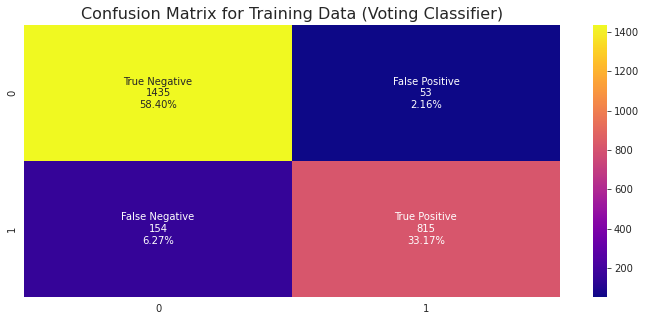

In [80]:
# Create confusion matrix and plot for training data
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
train_cnf_matrix = confusion_matrix(Y_train,voting_clf_train)
train_counts = ["{0:0.0f}".format(value) for value in train_cnf_matrix.flatten()]
train_percentage = ["{0:.2%}".format(value) for value in train_cnf_matrix .flatten()/np.sum(train_cnf_matrix)]
train_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,train_counts,train_percentage)]
train_labels = np.asarray(train_labels).reshape(2,2)

# Plot confusion matrix for training data
plt.figure(figsize = (12,5))
sns.heatmap(train_cnf_matrix, annot=train_labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix for Training Data (Voting Classifier)',fontsize=16)


In [81]:
# Print classification report for training data
print("Classification report (Training): \n")
print(f"{classification_report(Y_train,voting_clf_train)}")


Classification report (Training): 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1488
           1       0.94      0.84      0.89       969

    accuracy                           0.92      2457
   macro avg       0.92      0.90      0.91      2457
weighted avg       0.92      0.92      0.91      2457



Text(0.5, 1.0, 'Confusion Matrix for Testing Data (Voting Classifier)')

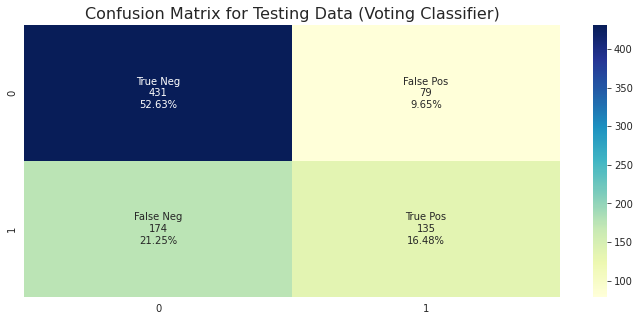

In [84]:
# Define group names for the confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Generate confusion matrix for testing data using the final voting classifier
test_cnf_matrix = confusion_matrix(Y_test, voting_clf_test)

# Format confusion matrix counts as integers with no decimal places
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]

# Format confusion matrix percentages as strings with two decimal places
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]

# Combine counts and percentages into labels for the confusion matrix
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, test_counts, test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)

# Plot the confusion matrix heatmap for the testing data
plt.figure(figsize = (12,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='YlGnBu')
plt.title('Confusion Matrix for Testing Data (Voting Classifier)', fontsize=16)


In [85]:
#Prints the classification report for the testing data
print("Classification report (Testing): \n")
print(f"{classification_report(Y_test,voting_clf_test)}")

Classification report (Testing): 

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       510
           1       0.63      0.44      0.52       309

    accuracy                           0.69       819
   macro avg       0.67      0.64      0.64       819
weighted avg       0.68      0.69      0.68       819



# Validating the Model

In [86]:
# Define a function for making predictions using a trained model
# Inputs:
# - model: a trained machine learning model
# - inputs: a dictionary containing the input values for making the prediction
# Output:
# - pred: the predicted target variable value
def predict(model, inputs):
    # Convert the input values to a Pandas DataFrame
    input_df = pd.DataFrame([inputs])
    # Use the trained model to make a prediction on the input DataFrame
    pred = model.predict(input_df)[0]
    # Return the predicted target variable value
    return pred


In [87]:
# This is an example input for predicting water potability using the final voting classifier
# It consists of 5 features, pH, hardness, solids, chloramines, and sulfate
# These values are based on a hypothetical water sample
first_input = {'ph':6.8,
               'hardness': 129.932,
               'solids': 19440.861,
               'chloramines': 9.143,
               'sulfate': 295.514}


In [88]:
#to predict the water potability based on the given input values
predict(voting_clf, first_input)

1

Potable water is denoted by 1, while not potable water is denoted by 0. 
Our result is 1 hence our model predits water is potable